<a href="https://colab.research.google.com/github/Sudin2001/Project-Of-ML/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/segmentation data (1).csv')

In [ ]:
df.shape

(2000, 8)

In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
df.shape

(2000, 7)

In [ ]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [ ]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df_scaled=df.copy()

In [ ]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
df1=pd.DataFrame(df_scaled,columns=['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'])

In [ ]:
mean = np.mean(df_scaled, axis=0)  # Compute mean for each column
stddev = np.std(df_scaled, axis=0)  # Compute standard deviation for each column
min_value = np.min(df_scaled, axis=0)  # Compute minimum value for each column
max_value = np.max(df_scaled, axis=0)  # Compute maximum value for each column

print("Mean:", mean)
print("Standard Deviation:", stddev)
print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Mean: [0.457      0.4965     0.30877586 0.346      0.3111973  0.40525
 0.3695    ]
Standard Deviation: [0.49814757 0.49998775 0.20200814 0.19987663 0.13928643 0.31921378
 0.40616468]
Minimum Value: [0. 0. 0. 0. 0. 0. 0.]
Maximum Value: [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
dataframe=df1.drop(['Sex', 'Marital status', 'Education',
       'Occupation', 'Settlement size'],axis=1,inplace=False)

In [ ]:
'''Sex: Biological sex (gender) of a customer
  0: male, 1: female
Marital status: Marital status of a customer
  0: single, 1: non-single (divorced/separated/married/widowed)
Age: The age of the customer ine years, calculated as current year minus the year of the birth of the customer at the time of creation of the dataset
  18 Min value, 78 Max value
Education: Level of education of the customer
  0: other/unknown, 1: high school, 2: university, 3: graduate school
Income: Self-reported annual income in US dollars of the customer
  35832 Min value, 309364 Max value
Occupation: Category of occupation of the customer
  0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly qualified employee/officer
Settlement size: The size of the city that the customer
  0: small city, 1: mid-sized city, 2: big city'''

'Sex: Biological sex (gender) of a customer\n  0: male, 1: female\nMarital status: Marital status of a customer\n  0: single, 1: non-single (divorced/separated/married/widowed)\nAge: The age of the customer ine years, calculated as current year minus the year of the birth of the customer at the time of creation of the dataset\n  18 Min value, 78 Max value\nEducation: Level of education of the customer\n  0: other/unknown, 1: high school, 2: university, 3: graduate school\nIncome: Self-reported annual income in US dollars of the customer\n  35832 Min value, 309364 Max value\nOccupation: Category of occupation of the customer\n  0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly qualified employee/officer\nSettlement size: The size of the city that the customer\n  0: small city, 1: mid-sized city, 2: big city'

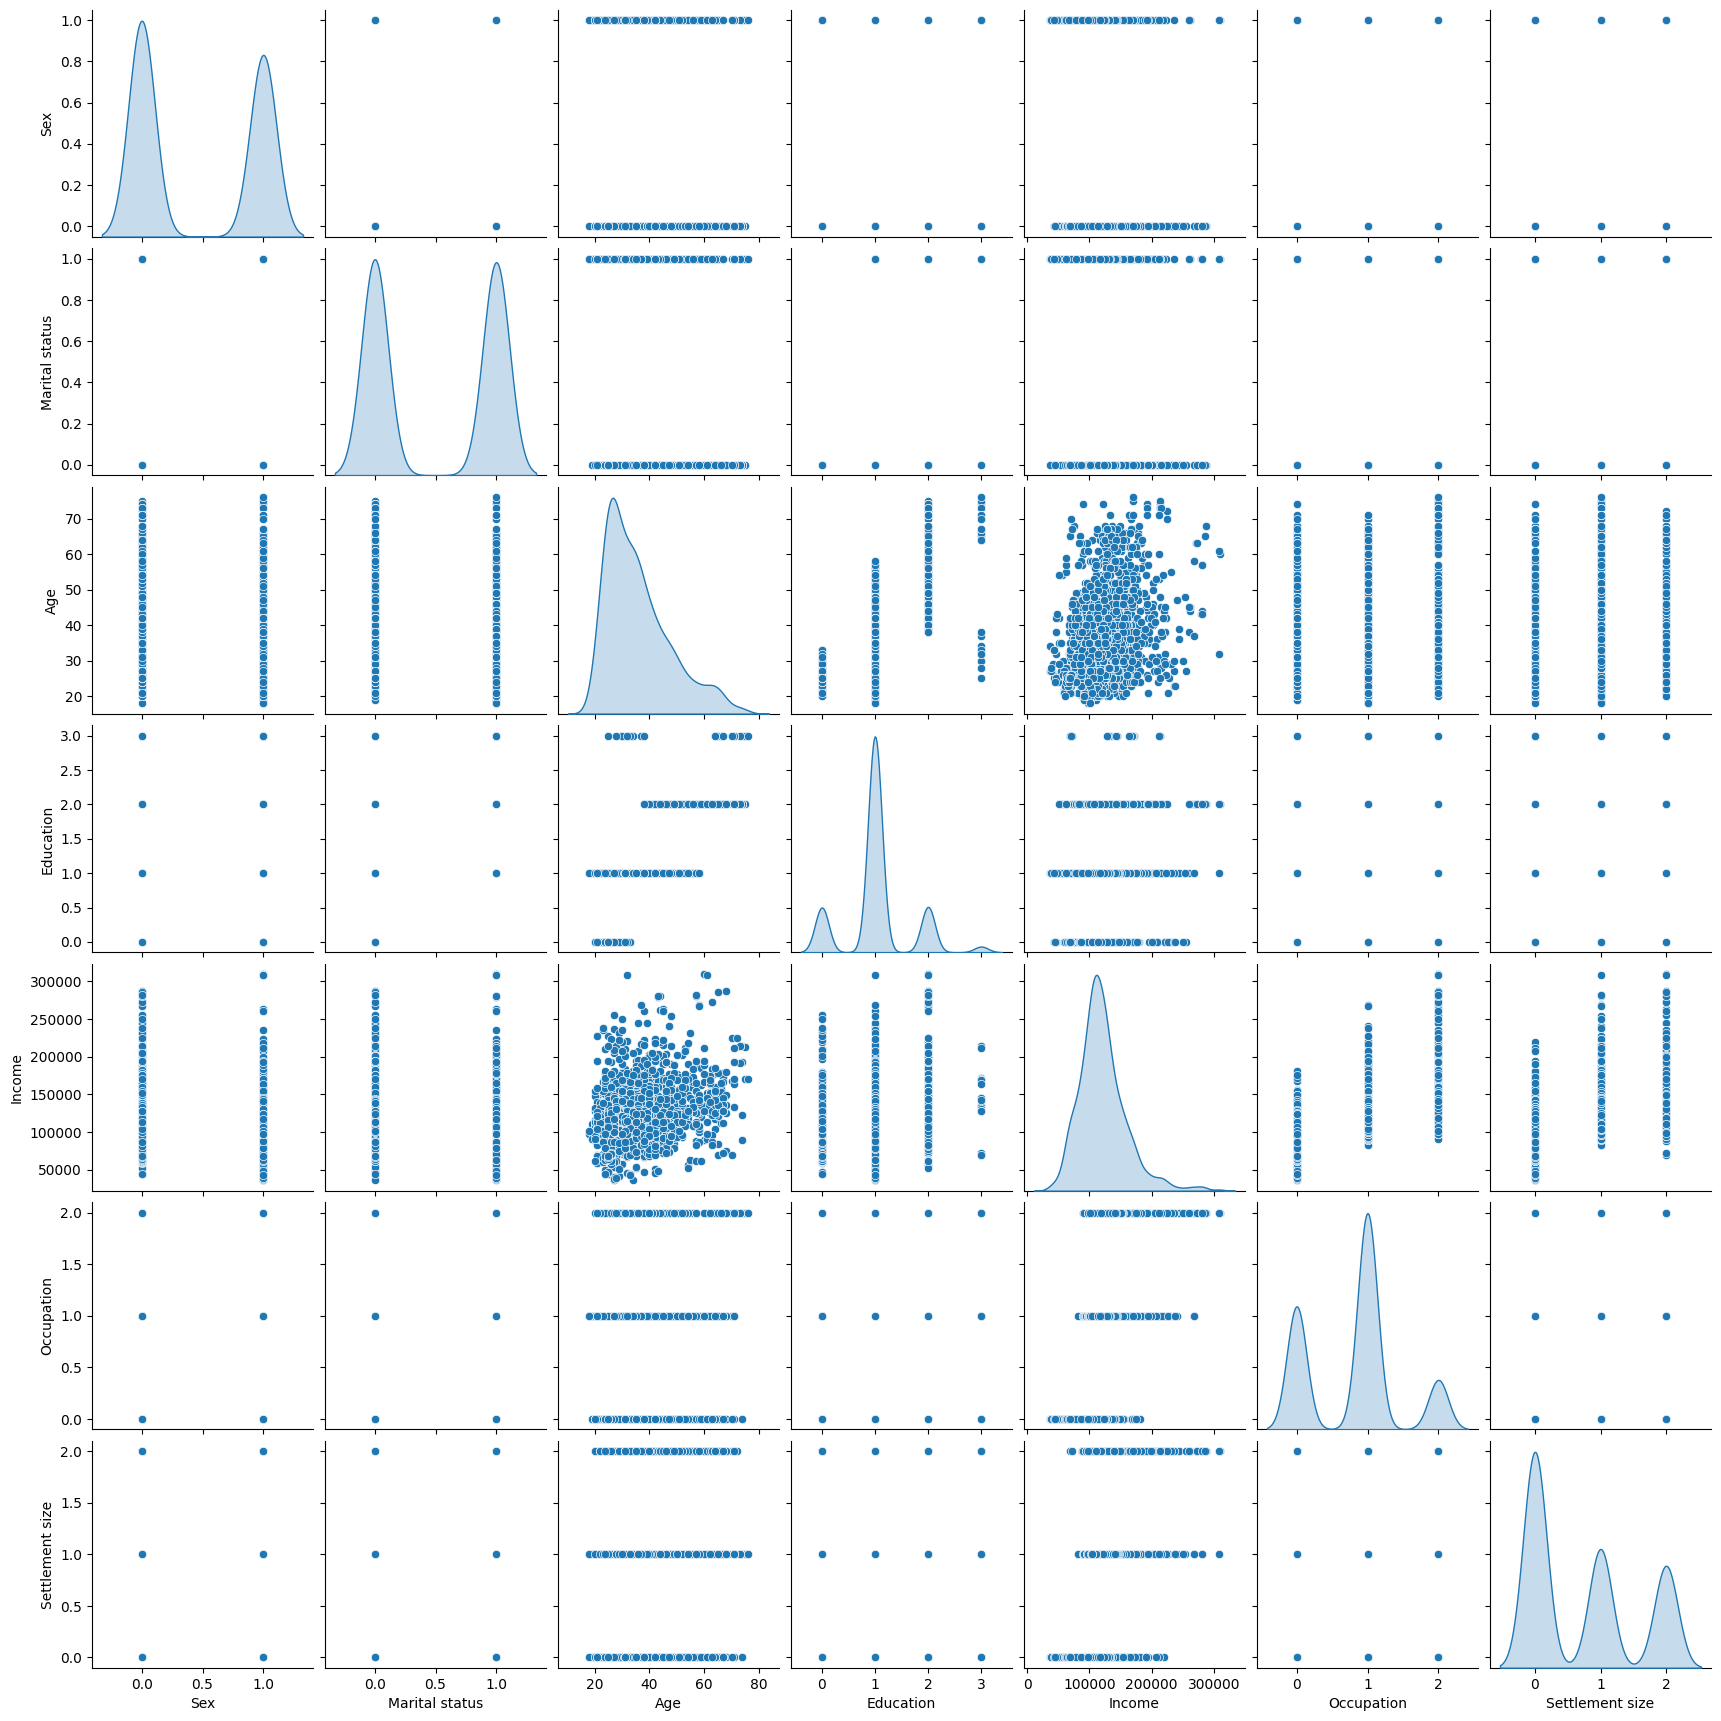

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

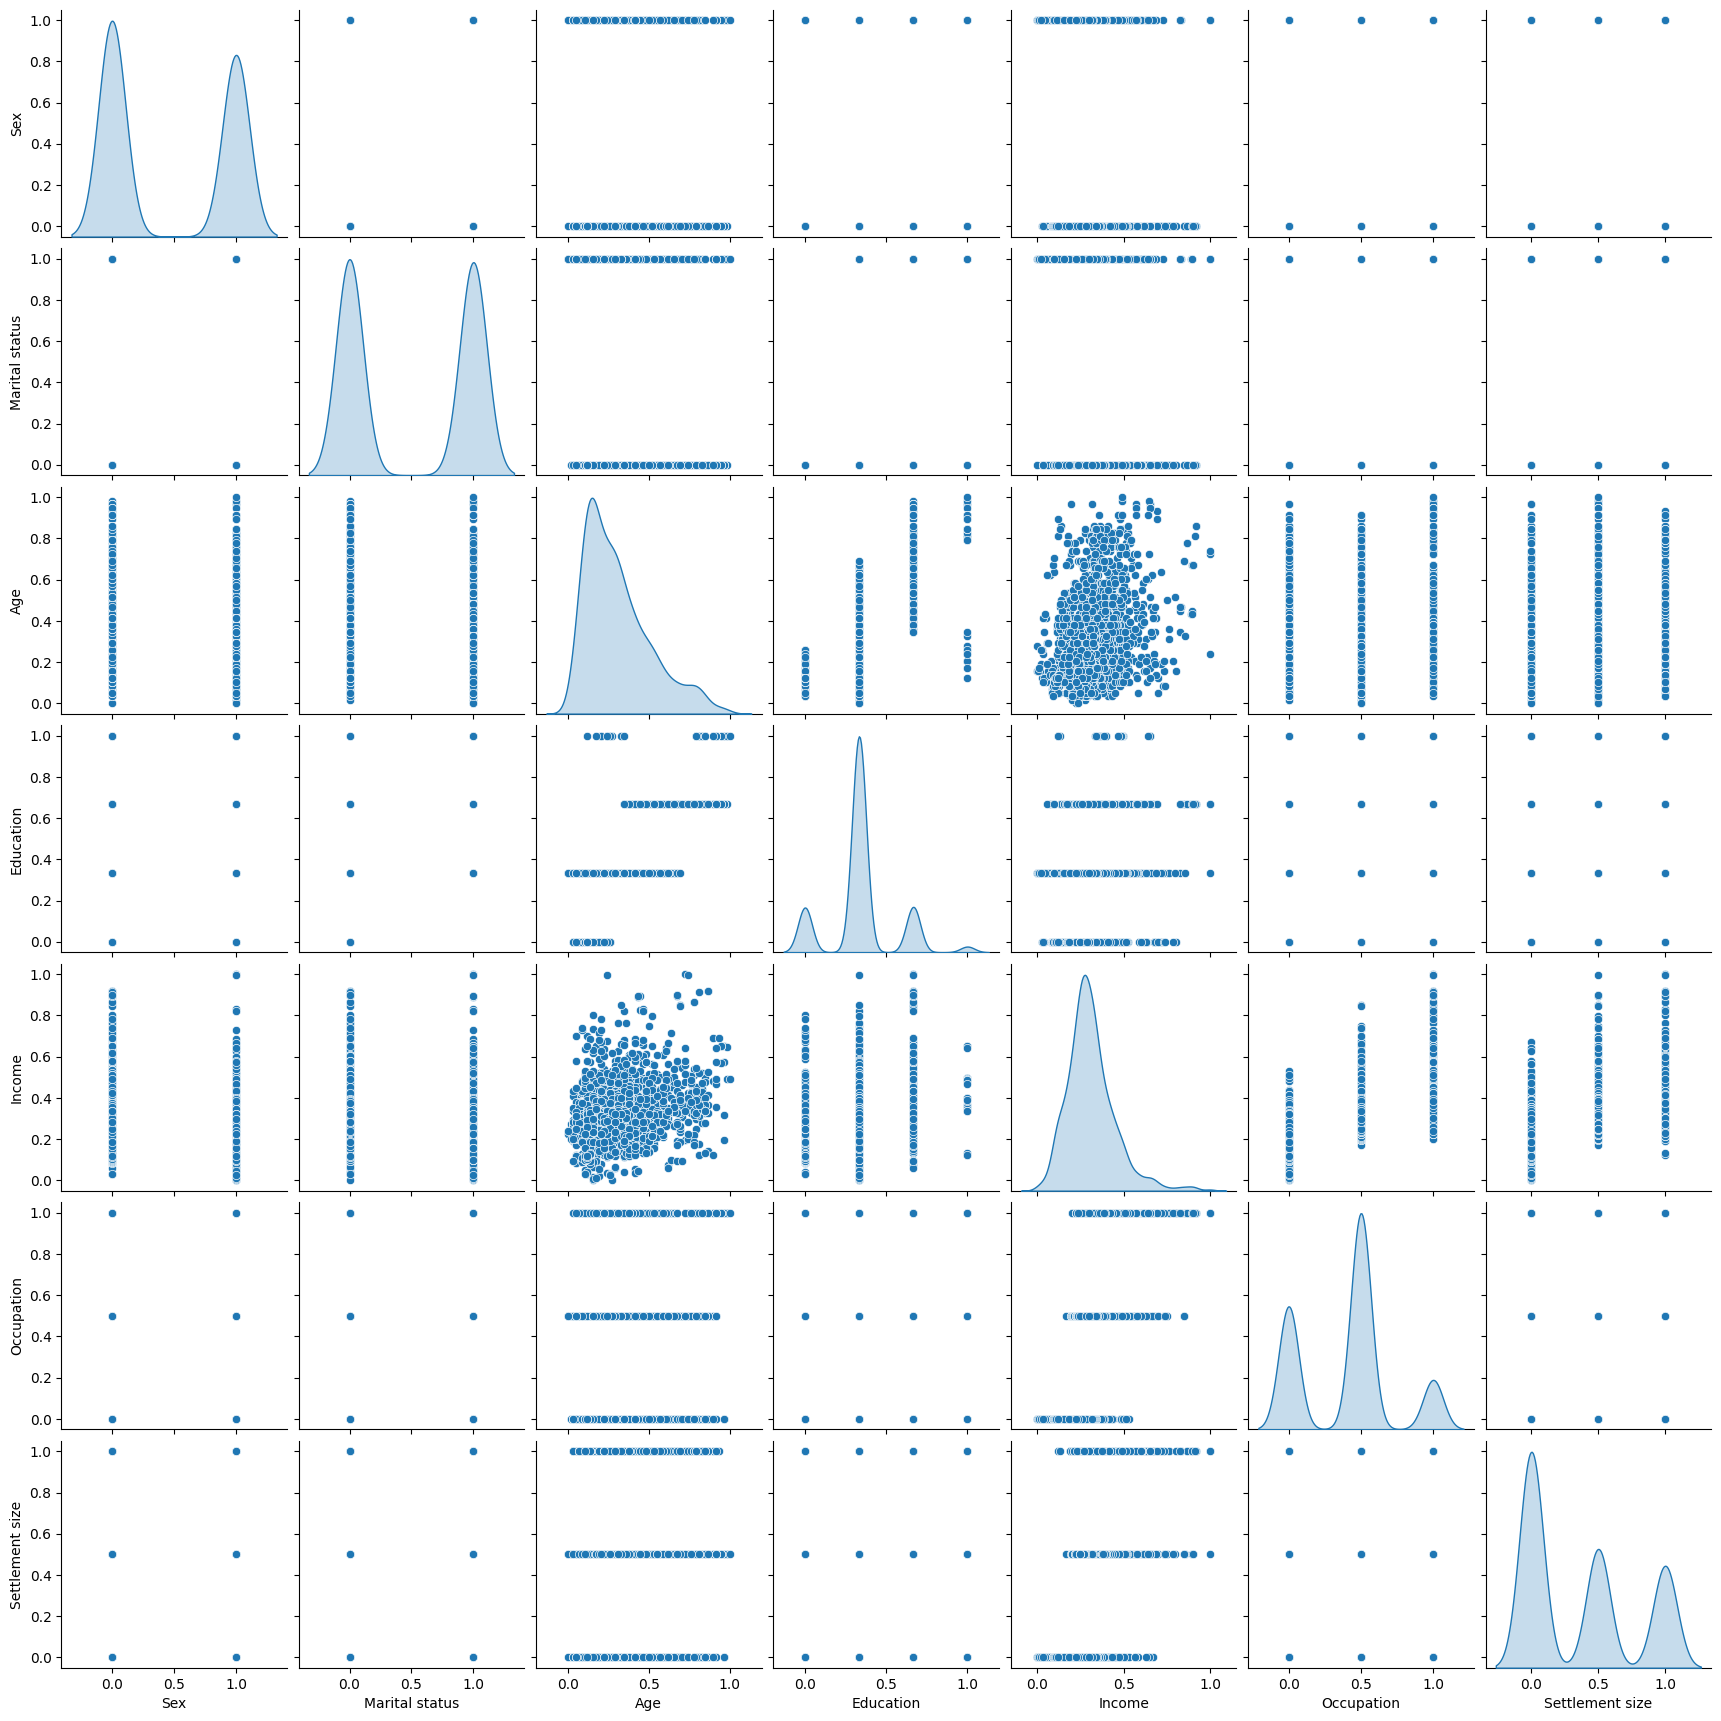

In [ ]:
sns.pairplot(df1, diag_kind = 'kde')

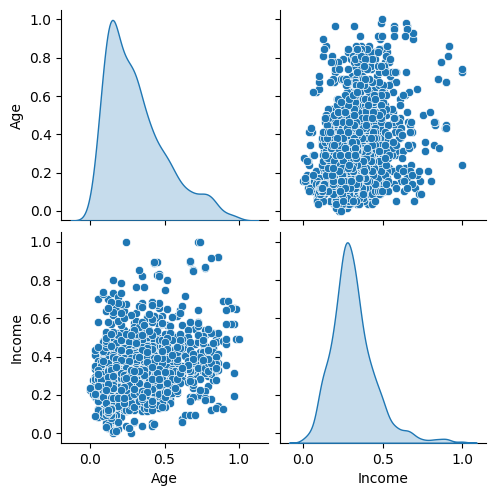

In [ ]:
sns.pairplot(dataframe, diag_kind = 'kde')

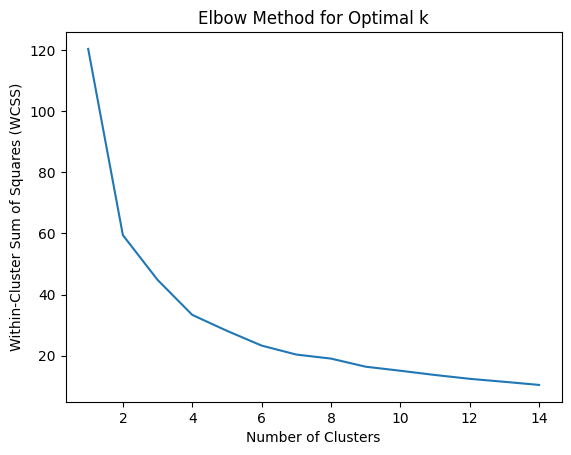

In [ ]:
from sklearn.cluster import KMeans


# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []


for i in range(1, 15):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(dataframe)
    # Append the WCSS (inertia_) to the list
    wcss.append(k_means.inertia_)

# Plot the elbow curve
plt.plot(np.arange(1, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#k=4
k_means_optimum= KMeans(n_clusters=4,init='k-means++',random_state=42)
y0=k_means_optimum.fit_predict(dataframe)

print(y0)

[1 0 2 ... 0 0 0]


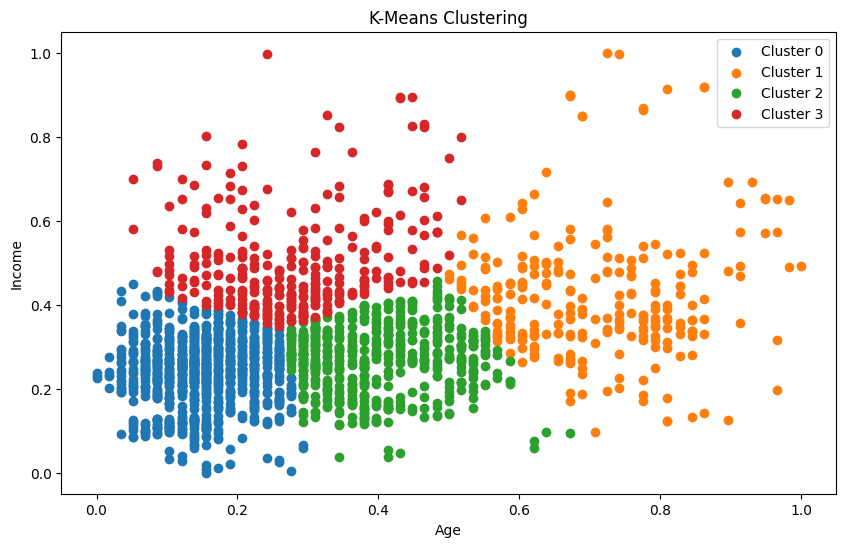

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = dataframe[y0 == cluster]  # Filter data points for the current cluster
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.title('K-Means Clustering')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(dataframe, y0)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4027888505539315


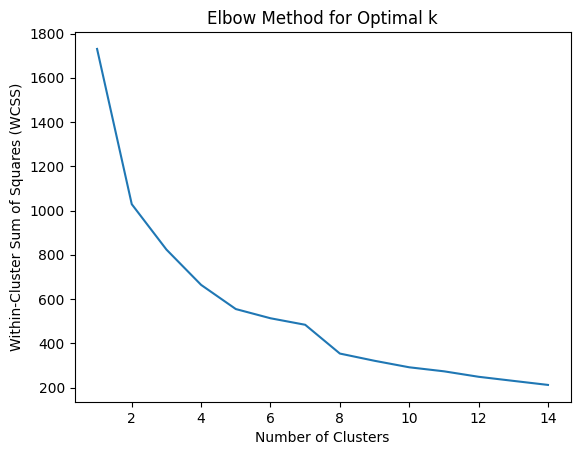

In [ ]:
from sklearn.cluster import KMeans


# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []


for i in range(1, 15):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(df1)
    # Append the WCSS (inertia_) to the list
    wcss.append(k_means.inertia_)

# Plot the elbow curve
plt.plot(np.arange(1, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
#k=6
k_means_optimum= KMeans(n_clusters=6,init='k-means++',random_state=42)
y=k_means_optimum.fit_predict(df1)

print(y)

[0 4 0 ... 0 1 0]


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df1, y)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4062099566723158


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=7)

In [ ]:
# Fit and transform the data
pca_result = pca.fit_transform(df1)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

Explained Variance: [0.48324689 0.24823223 0.11210423 0.07713658 0.06243603 0.00950565
 0.00733839]


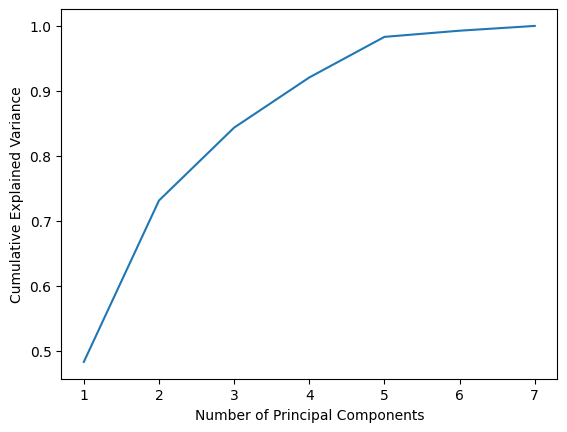

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [ ]:
loadings = pca.components_

In [ ]:
first_component_loadings = loadings[0, :]
first_component_loadings

array([ 0.68655909,  0.64505047, -0.07470905,  0.09813024, -0.06168713,
       -0.14848014, -0.26736468])

In [ ]:
second_component_loadings = loadings[6, :]
second_component_loadings

array([ 0.03643199,  0.13790434,  0.67435644, -0.66816922, -0.2700713 ,
        0.07280372,  0.01447408])

In [ ]:
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
num_components

np.int64(5)

In [ ]:
pca = PCA(n_components=num_components)

In [ ]:
pca.fit(df1)

PCA(n_components=np.int64(5))

In [ ]:
reduced_data = pca.transform(df1)

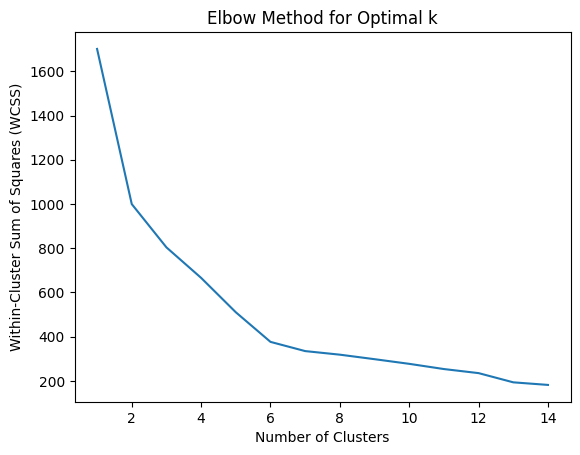

In [ ]:
from sklearn.cluster import KMeans


# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []


for i in range(1, 15):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(reduced_data)
    # Append the WCSS (inertia_) to the list
    wcss.append(k_means.inertia_)

# Plot the elbow curve
plt.plot(np.arange(1, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(reduced_data)


KMeans(n_clusters=6)

In [ ]:
y1=kmeans.fit_predict(reduced_data)
y1

array([2, 0, 1, ..., 1, 3, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_data, y1)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.37168369789254374


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=8)


In [ ]:
dbscan.fit(df1)

DBSCAN(eps=0.1, min_samples=8)

In [ ]:
cluster_labels = dbscan.labels_

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df1, cluster_labels)
silhouette_avg

np.float64(0.44598087348549414)

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=6)


In [ ]:
dbscan.fit(reduced_data)

DBSCAN(eps=0.1, min_samples=6)

In [ ]:
cluster_labels = dbscan.labels_

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
silhouette_avg

np.float64(0.7046513037253729)

In [ ]:
# prompt: If I want to see which point goes to which claster then how

# To see which point goes to which cluster, you can add the cluster labels back to your original dataframe.

# For the clustering on 'dataframe' (Age, Income)
# y0 contains the cluster assignments for each data point in 'dataframe'
dataframe['Cluster'] = y0
print("Cluster assignments for dataframe (Age, Income):")
print(dataframe.head()) # Show first few rows with cluster assignment
print("\nDistribution of points per cluster for dataframe:")
print(dataframe['Cluster'].value_counts()) # Count points in each cluster

# For the clustering on 'df1' (all scaled features)
# y contains the cluster assignments for each data point in 'df1'
df1['Cluster'] = y
print("\nCluster assignments for df1 (all scaled features):")
print(df1.head()) # Show first few rows with cluster assignment
print("\nDistribution of points per cluster for df1:")
print(df1['Cluster'].value_counts()) # Count points in each cluster

# For the clustering on 'reduced_data' (PCA reduced features)
# y1 contains the cluster assignments for each data point in 'reduced_data'
# We can add this back to the original df as well if needed, aligning by index
df['Cluster_PCA'] = y1
print("\nCluster assignments for original df after clustering on PCA reduced data:")
print(df.head()) # Show first few rows with PCA cluster assignment
print("\nDistribution of points per cluster for original df (PCA clustering):")
print(df['Cluster_PCA'].value_counts()) # Count points in each cluster

Cluster assignments for dataframe (Age, Income):
        Age    Income  Cluster
0  0.844828  0.324781        1
1  0.068966  0.420210        0
2  0.534483  0.195144        2
3  0.465517  0.496223        3
4  0.603448  0.413842        1

Distribution of points per cluster for dataframe:
Cluster
0    888
2    546
3    308
1    258
Name: count, dtype: int64

Cluster assignments for df1 (all scaled features):
   Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  Cluster  
0              1.0        0  
1              1.0        4  
2              0.0        0  
3              0.5        0  
4              0.5        0